# Sigmoid Perceptron using TensorFlow
Esta Jupyter Notebook implementa un modelo de perceptrón con función de activación sigmoide para la clasificación binaria utilizando la biblioteca TensorFlow.

Nota: Cuando digo salida directa, me refiero a una salida visible en el notebook.

### 1. Import standard libraries
Este bloque de código instala y luego importa todas las bibliotecas necesarias para la manipulación, procesamiento de datos, visualización, y construcción del modelo de perceptrón sigmoide utilizando TensorFlow. Además, se incluyen herramientas para dividir los datos, normalizar las características y evaluar el rendimiento del modelo.

**Salida**: No hay salida directa, solo se importan las librerías necesarias para el resto del notebook.


In [1]:
# Instalamos la librería 'ucimlrepo' para descargar datasets del repositorio UCI
%pip install ucimlrepo  

# Importamos la función 'fetch_ucirepo' para descargar datasets de UCI
from ucimlrepo import fetch_ucirepo  
# Importamos pandas para manejar datos en forma de DataFrames
import pandas as pd  
# Importamos plotly para crear gráficos interactivos
import plotly.express as px  
# Importamos seaborn para generar gráficos estadísticos
import seaborn as sns  
# Importamos matplotlib para generar gráficos de datos
import matplotlib.pyplot as plt  
# Importamos numpy para realizar operaciones numéricas
import numpy as np  
# Importamos TensorFlow para crear y entrenar modelos de redes neuronales
import tensorflow as tf 

# Importamos 'train_test_split' para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split  
# Importamos 'StandardScaler' para normalizar los datos
from sklearn.preprocessing import StandardScaler  
# Importamos 'ConfusionMatrixDisplay' para mostrar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay  


Note: you may need to restart the kernel to use updated packages.


### 2. Download the ```occupancy-detection``` dataset

For further information regarding this dataset, visit the UC Irving Machine Learning Repository [here](https://archive.ics.uci.edu/dataset/357/occupancy+detection). <br>

En este bloque se descarga el dataset "`Occupancy Detection`" desde el repositorio UCI utilizando su ID, y se almacena en una variable. A continuación, se extraen los datos originales para ser procesados en las siguientes etapas del modelo de perceptrón sigmoide.

**Salida**:  No hay salida directa, solo se descarga el dataset y se almacenan sus datos en la variable `data` para su uso posterior.

In [2]:
# Download `occupancy-detection` dataset
# using the id=357
# Descargamos el dataset 'occupancy-detection' usando su identificador en el repositorio UCI (ID=357)
occupancy_detection = fetch_ucirepo(id=357)

# Build the feature and the target data sets
# Construimos el conjunto de datos con las características y la etiqueta objetivo
data = occupancy_detection.data.original

### 3. Perform an exploratory data analysis
En este bloque se realiza una limpieza de los datos eliminando las columnas irrelevantes como `date` e `id`, se asegura que todos los valores de las columnas sean numéricos, y se eliminan las filas que contienen valores faltantes.

**Salida**: No hay salida directa, se está limpiando el dataset al eliminar columnas irrelevantes y filas con valores faltantes. El DataFrame `df` resultante estará preparado para el análisis y el entrenamiento del modelo.

In [3]:
# Eliminamos las columnas 'date' e 'id' ya que no son útiles para el análisis
df = data.drop(['date', 'id'], axis=1)

# Convertimos todas las columnas a valores numéricos, reemplazando los errores por NaN (valores no válidos)
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

# Eliminamos las filas que contengan valores NaN (datos faltantes)
df = df.dropna()

#### 3a. Print some samples of the ```features``` and the ```target``` variables
En este bloque se imprimen algunas muestras del DataFrame df para visualizar las características (features) y la variable objetivo (target), permitiendo una rápida inspección de los datos tras la limpieza inicial.

**Salida**: Se muestran las primeras filas del DataFrame `df` después de la limpieza. Se pueden observar las características del dataset y la variable objetivo `Occupancy`, que indica si una sala está ocupada (1) o no (0).


In [4]:
# Mostramos las primeras filas del DataFrame para visualizar las características y la variable objetivo
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


#### 3b. Obtain statistics about the ```features``` and the ```target``` variables
En este bloque se generan estadísticas descriptivas para las características (features) y la variable objetivo (target). Estas estadísticas incluyen valores como la media, la desviación estándar, y los percentiles, proporcionando un resumen general de los datos.

**Salida**: Se genera un resumen estadístico del DataFrame `df`, que incluye la media, desviación estándar, valores mínimos, máximos y percentiles (25%, 50%, 75%) de cada característica. Esto proporciona una visión general de la distribución de los datos.

In [5]:
# Generamos estadísticas descriptivas del DataFrame, incluyendo media, desviación estándar y percentiles
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


#### 3c. Visualise a scatter matrix plot using ```plotly``` to visualise the relationships between features
En este bloque se genera una matriz de dispersión utilizando plotly para visualizar las relaciones entre las características del dataset. El gráfico usa diferentes colores para representar la variable objetivo (target) `Occupancy`, permitiendo una mejor comprensión de la interacción entre las características.

**Salida**: Se genera una matriz de dispersión (scatter plot matrix) que muestra la relación entre las diferentes características del dataset. Los puntos están coloreados según la variable objetivo `Occupancy` (ocupación), lo que permite visualizar cómo se agrupan los datos en función de las características. Esta visualización ayuda a identificar patrones o correlaciones entre las variables.

In [6]:
# Scatter plot matrix
# Seleccionamos las características (features) excluyendo la columna 'Occupancy'
features = df.drop(["Occupancy"], axis=1).columns

# Creamos la matriz de dispersión utilizando las características seleccionadas
fig = px.scatter_matrix(data_frame=df,
                        dimensions=features,
                        color=df['Occupancy'])

# Actualizamos los marcadores para ajustar el tamaño y otras configuraciones
fig.update_traces(marker=dict(size=4), diagonal_visible=False, showupperhalf=False)

# Ajustamos las dimensiones del gráfico y configuramos el título y el tamaño de la fuente
fig.update_layout(width=900, height=600, title="Occupancy Detection", font_size=9)

# Mostramos el gráfico
fig.show()

#### 3d. Visualise a pair plot to using ```seaborn``` to capture the relatioshops between features
En este bloque se utiliza la biblioteca seaborn para generar un `pair plot`, que permite visualizar las relaciones entre las diferentes características del dataset. Un **pair plot** crea gráficos de dispersión para cada par de características y gráficos de distribución para cada característica individual. El gráfico utiliza diferentes colores (`hue`) para representar la variable objetivo `Occupancy`, lo que facilita el análisis de patrones, correlaciones y posibles separaciones entre clases en el dataset.


**Salida**: Se genera un `pair plot` utilizando Seaborn, que muestra gráficos de dispersión entre pares de características del DataFrame `df`, con los puntos coloreados según la variable `Occupancy`. Esto permite visualizar mejor la distribución y las relaciones entre las características, además de observar posibles patrones que separan las clases (ocupado/no ocupado).


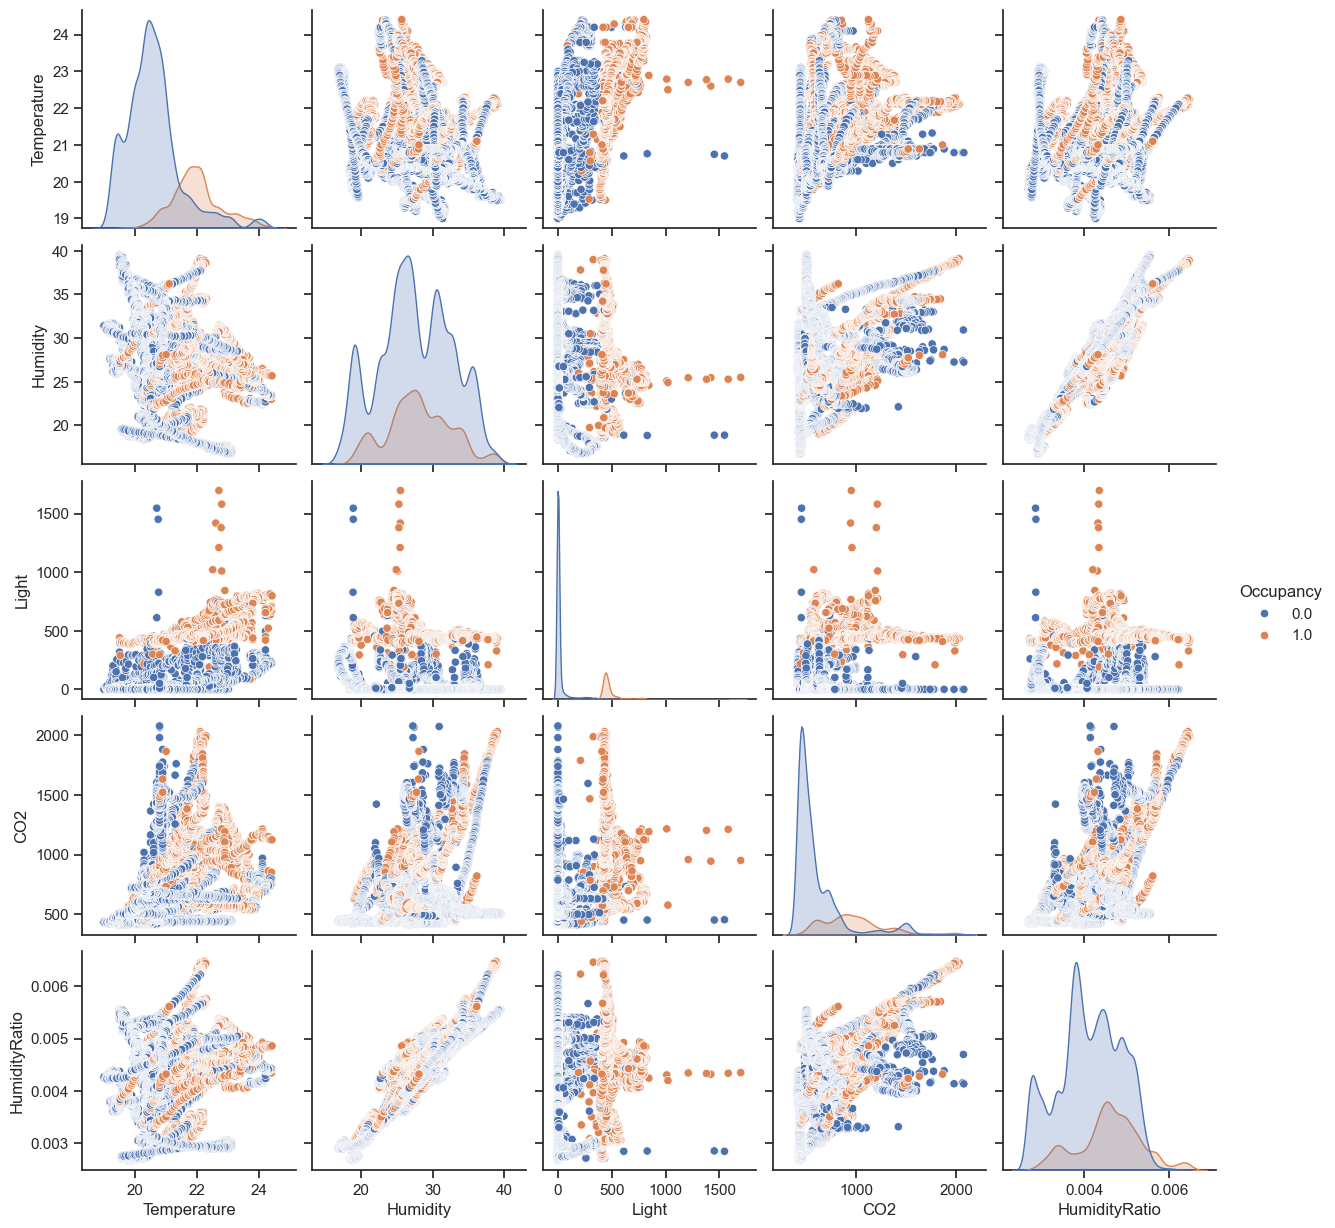

In [7]:
# Establecemos el tema visual de Seaborn con un estilo de 'ticks'
sns.set_theme(style="ticks")

# Generamos el pair plot utilizando Seaborn, diferenciando las clases de 'Occupancy' por colores
sns.pairplot(df, hue="Occupancy")

#### 3e. Visualise the histogram of classes
En este bloque se genera un histograma que muestra la distribución de la variable objetivo `Occupancy`. El gráfico permite visualizar la frecuencia de las diferentes clases (0: habitación no ocupada, 1: habitación ocupada) en el dataset.

**Salida**: Se genera un histograma que muestra la distribución de la variable `Occupancy`. El eje x indica las dos clases posibles: `0` (habitaciones no ocupadas) y `1` (habitaciones ocupadas), mientras que el eje y muestra la frecuencia de cada clase en el dataset. Este gráfico permite ver si el conjunto de datos está balanceado o si hay una predominancia de alguna clase.

Text(0, 0.5, 'frequency')

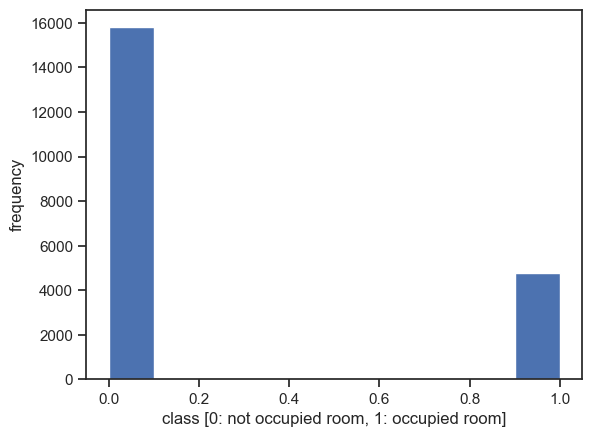

In [8]:
# Creamos un histograma de la variable objetivo 'Occupancy' para visualizar la distribución de las clases
plt.hist(df['Occupancy'])

# Etiquetamos el eje x para indicar que 0 representa habitaciones no ocupadas y 1 habitaciones ocupadas
plt.xlabel('class [0: not occupied room, 1: occupied room]')

# Etiquetamos el eje y para indicar que se está midiendo la frecuencia de las clases
plt.ylabel('frequency')

### 4. Training and evaluate your model

#### 4a. For reproducibility purposes only, set a particular seed number
En este bloque se establece una semilla aleatoria para TensorFlow con el fin de garantizar la reproducibilidad de los resultados. Esto asegura que cualquier operación aleatoria, como la inicialización de los pesos en el modelo, sea siempre la misma en cada ejecución.

**Salida**: No hay salida directa. Se establece una semilla global en TensorFlow para garantizar la reproducibilidad de los resultados en las operaciones aleatorias, asegurando que los experimentos produzcan los mismos resultados en cada ejecución.

In [9]:
# Set a global seed for reproducibility
# Establecemos una semilla global en TensorFlow para garantizar la reproducibilidad de los resultados
tf.random.set_seed(4500)

#### 4b. Build your feature and target sets
En este bloque se separan las características (features) y la variable objetivo (target). La variable `x` contiene todas las características del dataset, excluyendo la columna "`Occupancy`", mientras que `y` contiene la variable objetivo `Occupancy`, que indica si la habitación está ocupada o no.

**Salida**: No hay salida directa. Se separan las características (`x`) y la variable objetivo (`y`) del DataFrame. Las características (`x`) se usarán como entradas para el modelo, y la variable objetivo (`y`) contiene las etiquetas de clase que serán utilizadas para el entrenamiento y evaluación del modelo.

In [10]:
# Asignamos a 'x' todas las características del dataset, excluyendo la columna 'Occupancy'
x = df.drop(["Occupancy"], axis=1)

# Asignamos a 'y' la variable objetivo que contiene las clases 'Occupancy'
y = df['Occupancy']

#### 4c. Split your original data set into the training and testing sets
En este bloque se divide el dataset en dos partes: un conjunto de entrenamiento y un conjunto de prueba. El 80% de los datos se utiliza para entrenar el modelo, mientras que el 20% se reserva para evaluar el rendimiento del modelo.

**Salida**: No hay salida directa. El conjunto de datos se divide en un 80% para entrenamiento (`X_train`, `y_train`) y un 20% para prueba (`X_test`, `y_test`). Los datos se mezclan aleatoriamente (shuffle) y se asegura reproducibilidad utilizando `random_state=42`.

In [11]:
# Split the dataset into training and testing sets
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

#### 4d. Apply feature scaling and transform the training and testing sets
En este bloque se normalizan las características utilizando `StandardScaler`, lo que asegura que todas las características tengan una media de 0 y una desviación estándar de 1. Este escalado se aplica tanto al conjunto de entrenamiento como al de prueba.

**Salida**: No hay salida directa. Las características del conjunto de entrenamiento se ajustan y transforman usando `StandardScaler` para estandarizar los datos (media = 0 y desviación estándar = 1). El conjunto de prueba se transforma utilizando los mismos parámetros, asegurando que ambos conjuntos de datos estén en la misma escala.

In [12]:
# Standardise features
# Inicializamos el objeto 'StandardScaler' para normalizar las características
scaler = StandardScaler()

# Ajustamos y transformamos las características del conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformamos las características del conjunto de prueba con los mismos parámetros
X_test = scaler.transform(X_test)

#### 4e. Design your model architecture
En este bloque se define la arquitectura del modelo utilizando TensorFlow y Keras. El modelo consta de una capa de entrada con cinco características y una capa densa con una neurona de salida, utilizando la función de activación sigmoide para realizar la clasificación binaria.

**Salida**: No hay salida directa. Se define un modelo secuencial de Keras con una capa densa y una activación sigmoide. El modelo espera 5 características de entrada y produce una única salida que representa la probabilidad de que una habitación esté ocupada (`Occupancy`). Este modelo será utilizado para el entrenamiento y predicción.

In [13]:
# Define the model
# Definimos el modelo utilizando el modulo Sequential (secuencial) de Keras
def get_model():
    model = tf.keras.Sequential([
        # Capa de entrada con 5 características
        tf.keras.layers.InputLayer(input_shape=(5,)),
        # Capa densa con una neurona de salida y activación sigmoide
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model  # Devolvemos el modelo


#### 4f. Print the summary of your model parameters
En este bloque se imprime un resumen de la arquitectura y los parámetros del modelo. El método `summary()` de Keras muestra información sobre las capas del modelo, el número de parámetros entrenables, y la forma de entrada y salida.

**Salida**: Se imprime un resumen de la arquitectura del modelo. El resumen muestra:
- La estructura del modelo, incluyendo la capa densa con 1 neurona de salida y activación sigmoide.
- El número de parámetros entrenables (pesos y bias) en el modelo. <br><br>
Este resumen proporciona una visión general de los componentes y la complejidad del modelo.

In [14]:
# Obtenemos el modelo definido en la función 'get_model'
model = get_model()

# Imprimimos un resumen de la arquitectura del modelo y sus parámetros
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


#### 4g. Configure the optimiser, loss function and metrics for training purposes
En este bloque se compila el modelo, especificando el optimizador (`adam`), la función de pérdida (`binary_crossentropy`) para la clasificación binaria, y la métrica de evaluación (`accuracy`) que se utilizará durante el entrenamiento y la evaluación.

**Salida**: No hay salida directa. El modelo se compila utilizando el optimizador `Adam`, que ajusta los pesos durante el entrenamiento, la función de pérdida `binary_crossentropy` (adecuada para clasificación binaria), y se define `accuracy` como la métrica para evaluar el rendimiento del modelo.

In [15]:
# Compile the model
# Compilamos el modelo, definiendo el optimizador Adam, la función de pérdida binaria, y la métrica de precisión
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Evaluación del Modelo en el Conjunto de Prueba
En este bloque, se evalúa el rendimiento del modelo utilizando el conjunto de datos de prueba. La evaluación devuelve la pérdida y la precisión del modelo. Posteriormente, se imprime la precisión obtenida en el conjunto de prueba.

**Salida**: Se imprimen dos resultados:
- **Loss (Pérdida)**: La función de pérdida en el conjunto de prueba, que indica qué tan bien el modelo realiza la clasificación.
- **Accuracy (Precisión)**: La precisión del modelo en el conjunto de prueba, mostrando el porcentaje de predicciones correctas. Esta métrica se imprime con cuatro decimales para mayor claridad.

In [16]:
# Evaluate the model on the test data
# Evaluamos el modelo en el conjunto de prueba, obteniendo la pérdida y la precisión
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimimos la precisión del modelo en el conjunto de prueba con cuatro decimales
print(f"Test Accuracy: {accuracy:.4f}")

129/129 [==============================] - 1s 6ms/step - loss: 0.5512 - accuracy: 0.7466
Test Accuracy: 0.7466


#### 4h. Fit your model to the training data set (training), using a 20% of it for validation purposes
En este bloque se entrena el modelo utilizando el conjunto de datos de entrenamiento (`X_train`, `y_train`). Se especifica que el modelo entrenará durante 50 épocas, con un tamaño de lote de 32. Además, se utiliza el 20% de los datos de entrenamiento para validación durante el proceso de ajuste del modelo.

**Salida**: Durante el entrenamiento, se muestra la salida en cada una de las 50 épocas, incluyendo:
- **Loss (Pérdida)**: El valor de la función de pérdida en el conjunto de entrenamiento.
- **Accuracy (Precisión)**: La precisión del modelo en el conjunto de entrenamiento.
- **Validation Loss (Pérdida de validación)**: La pérdida calculada en el conjunto de validación.
- **Validation Accuracy (Precisión de validación)**: La precisión del modelo en el conjunto de validación.<br><br>
Estos valores permiten monitorear el progreso del modelo y evaluar si está mejorando o si está sobreajustándose a los datos de entrenamiento.


In [17]:
# Train the model
# Entrenamos el modelo utilizando el conjunto de entrenamiento, durante 50 épocas, con un tamaño de lote de 32
# Usamos el 20% del conjunto de entrenamiento para validación
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20)

Epoch 1/50
412/412 [==============================] - 4s 8ms/step - loss: 0.4068 - accuracy: 0.8989 - val_loss: 0.3095 - val_accuracy: 0.9498
Epoch 2/50
412/412 [==============================] - 3s 8ms/step - loss: 0.2608 - accuracy: 0.9544 - val_loss: 0.2219 - val_accuracy: 0.9574
Epoch 3/50
412/412 [==============================] - 4s 9ms/step - loss: 0.1966 - accuracy: 0.9612 - val_loss: 0.1754 - val_accuracy: 0.9617
Epoch 4/50
412/412 [==============================] - 4s 11ms/step - loss: 0.1591 - accuracy: 0.9664 - val_loss: 0.1453 - val_accuracy: 0.9675
Epoch 5/50
412/412 [==============================] - 5s 11ms/step - loss: 0.1339 - accuracy: 0.9719 - val_loss: 0.1242 - val_accuracy: 0.9748
Epoch 6/50
412/412 [==============================] - 5s 12ms/step - loss: 0.1160 - accuracy: 0.9783 - val_loss: 0.1089 - val_accuracy: 0.9796
Epoch 7/50
412/412 [==============================] - 5s 12ms/step - loss: 0.1030 - accuracy: 0.9831 - val_loss: 0.0974 - val_accuracy: 0.9833
Ep

#### 4i. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)
En este bloque se grafican las curvas de aprendizaje, mostrando la precisión durante el entrenamiento y la validación a lo largo de las épocas. Estas curvas permiten analizar el comportamiento del modelo y determinar si está ocurriendo sobreajuste (overfitting), subajuste (underfitting), o si el ajuste es adecuado.

**Salida**: Se genera un gráfico que muestra las `curvas de precisión` del entrenamiento y de la validación a lo largo de las 50 épocas. El eje x representa las épocas, mientras que el eje y muestra la precisión. El gráfico incluye dos curvas:
- **Train Accuracy**: Muestra cómo mejora (o no) la precisión en los datos de entrenamiento a lo largo de las épocas.
- **Validation Accuracy**: Muestra la precisión en el conjunto de validación, lo que permite evaluar si el modelo está generalizando bien o sobreajustándose a los datos de entrenamiento.<br><br>
Una cuadrícula y leyenda facilitan la interpretación del gráfico.


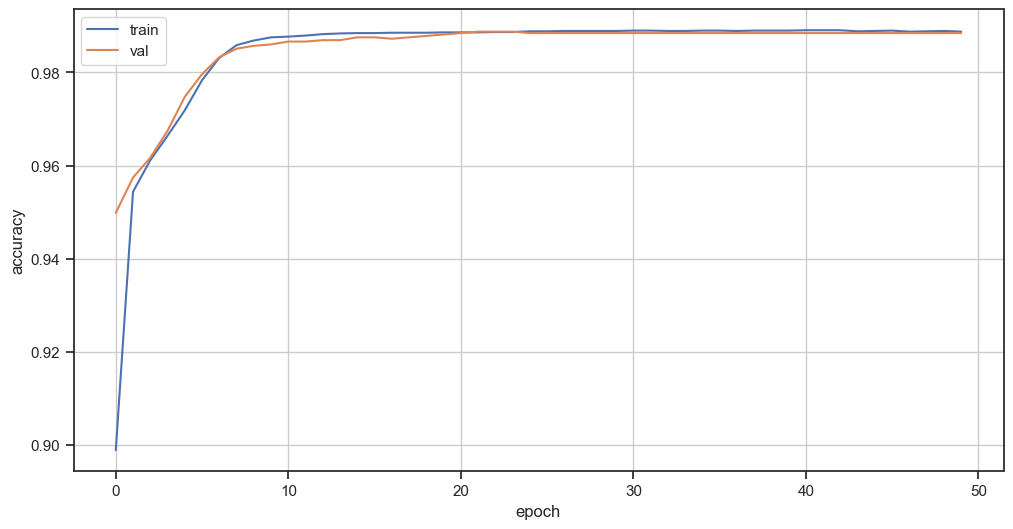

In [18]:
# Plot validation and testing accuracy
# Creamos una figura con un tamaño de 12x6 para visualizar las curvas de aprendizaje
plt.figure(figsize=(12,6))

# Graficamos la precisión del entrenamiento en función de las épocas
plt.plot(history.history['accuracy'])

# Graficamos la precisión de la validación en función de las épocas
plt.plot(history.history['val_accuracy'])

# Etiquetamos el eje x indicando que se refiere a las épocas
plt.xlabel('epoch')

# Etiquetamos el eje y indicando que se refiere a la precisión
plt.ylabel('accuracy')

# Añadimos una leyenda para diferenciar las curvas de entrenamiento y validación
plt.legend(['train', 'val'])

# Añadimos una cuadrícula al gráfico
plt.grid()

#### 4j. Visualise the learning curves for analysis purposes (overfitting / underfitting / right fitting)
En este bloque se grafican las curvas de pérdida durante el entrenamiento y la validación a lo largo de las épocas. Estas curvas muestran cómo la función de pérdida cambia con el tiempo, lo que ayuda a analizar si el modelo está mejorando o si está ocurriendo sobreajuste (overfitting) o subajuste (underfitting).

**Salida**: Se genera un gráfico que muestra las `curvas de pérdida` tanto para el entrenamiento como para la validación a lo largo de las 50 épocas. El eje x representa las épocas, y el eje y muestra el valor de la función de pérdida. El gráfico incluye dos curvas:
- **Train Loss**: Muestra cómo disminuye (o no) la pérdida en los datos de entrenamiento a lo largo de las épocas.
- **Validation Loss**: Muestra la pérdida en el conjunto de validación, lo que permite evaluar si el modelo está sobreajustándose o generalizando bien.
<br><br>
Al igual que con la gráfica anterior, la leyenda y la cuadrícula ayudan a interpretar mejor las diferencias entre las pérdidas de entrenamiento y validación.

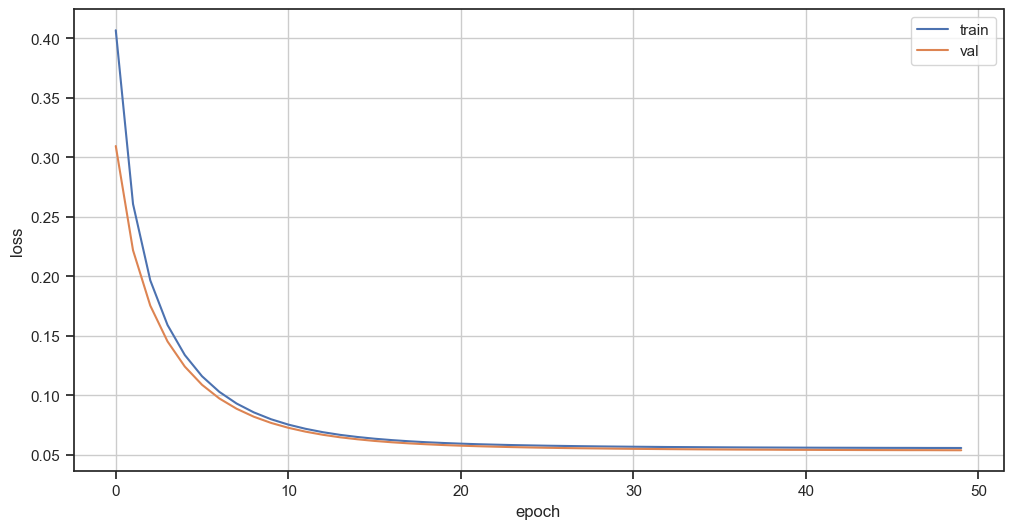

In [19]:
# Plot validation and testing loss
# Creamos una figura con un tamaño de 12x6 para visualizar las curvas de pérdida
plt.figure(figsize=(12,6))

# Graficamos la pérdida del entrenamiento en función de las épocas
plt.plot(history.history['loss'])

# Graficamos la pérdida de la validación en función de las épocas
plt.plot(history.history['val_loss'])

# Etiquetamos el eje x indicando que se refiere a las épocas
plt.xlabel('epoch')

# Etiquetamos el eje y indicando que se refiere a la pérdida
plt.ylabel('loss')

# Añadimos una leyenda para diferenciar las curvas de entrenamiento y validación
plt.legend(['train', 'val'])

# Añadimos una cuadrícula al gráfico
plt.grid()

##### Imprimir los Pesos del Modelo
En este bloque se accede a los pesos aprendidos por el modelo después del entrenamiento. Se imprimen los pesos de la primera capa del modelo, que corresponden a los valores ajustados para realizar las predicciones.

**Salida**: Se imprimen los pesos aprendidos por el modelo en la primera capa. Los pesos incluyen:
- **Matriz de pesos**: Contiene los valores aprendidos para cada característica de entrada.
- **Bias**: Un vector de bias asociado a la capa.
<br><br>
Estos pesos y bias representan cómo el modelo ha ajustado sus parámetros para realizar las predicciones.

In [20]:
# Print weights
# Obtenemos los pesos de la primera capa del modelo
weights = model.layers[0].get_weights()

# Imprimimos los pesos obtenidos
print(weights)

[array([[-1.083161 ],
       [-0.6500816],
       [ 4.543756 ],
       [ 1.0165523],
       [ 1.0130509]], dtype=float32), array([-3.9928226], dtype=float32)]


#### 4k. Evaluate the accuracy of the learnt model using the testing set
En este bloque se evalúa el rendimiento del modelo utilizando el conjunto de prueba, obteniendo la pérdida y la precisión. Luego, se imprime la precisión final del modelo en los datos de prueba.

**Salida**: 
- **Loss (Pérdida)**: Se muestra la función de pérdida del modelo en el conjunto de prueba, lo que indica qué tan bien está realizando la clasificación.
- **Accuracy (Precisión)**: Se imprime la precisión del modelo en el conjunto de prueba, mostrando el porcentaje de predicciones correctas con cuatro decimales.

In [21]:
# Evaluate the model on the test data
# Evaluamos el modelo en el conjunto de prueba, obteniendo la pérdida y la precisión
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimimos la precisión del modelo en el conjunto de prueba
print(f"Test Accuracy: {accuracy:.4f}")

129/129 [==============================] - 1s 7ms/step - loss: 0.0484 - accuracy: 0.9895
Test Accuracy: 0.9895


#### 4l. Apply the learnt model to new data (run the next cell multiple times)
En este bloque se selecciona un ejemplo aleatorio del conjunto de prueba para predecir si la habitación está ocupada o no. El modelo realiza una predicción, y luego se imprimen los valores de entrada, la etiqueta real y la predicción del modelo.

**Salida**: 
- **Input**: Se imprime el valor de entrada utilizado para la predicción.
- **Target (Etiqueta real)**: Se muestra la etiqueta real (0 para no ocupado, 1 para ocupado) correspondiente a esa entrada en el conjunto de prueba.
- **Prediction (Predicción)**: Se imprime el valor de la predicción realizada por el modelo, que será un número entre 0 y 1, representando la probabilidad estimada de que la habitación esté ocupada. El valor se muestra con cuatro decimales.


In [22]:
# Predict on new data
# Seleccionamos un índice aleatorio dentro del rango de los datos de prueba
indx = np.random.randint(low=0, high=y_test.shape[0])

# Obtenemos el valor de entrada correspondiente al índice seleccionado
xi = np.array([X_test[indx,:]])

# Utilizamos el modelo para hacer una predicción sobre la nueva entrada
prediction = model.predict(xi)

# Imprimimos la entrada, la etiqueta real y la predicción del modelo
print(f"Input: {xi} \t Target: {y_test.iloc[indx]} \t Prediction: {prediction[0][0]:.4f}")

1/1 [==============================] - 0s 103ms/step
Input: [[-0.11294718  1.59837546 -0.01415369 -0.58736678  1.54178806]] 	 Target: 0.0 	 Prediction: 0.0178


### 5. Compute performance metrics
En este bloque, se predicen los valores de `y` utilizando el conjunto de prueba y se comparan con las etiquetas verdaderas para calcular la matriz de confusión. Esta métrica permite analizar cuántas predicciones fueron correctas y cuántas fueron incorrectas.

**Salida**: 
- Durante la evaluación del modelo en el conjunto de prueba, se muestra un mensaje de progreso indicando el número de lotes procesados (en este caso, 129) y el tiempo que toma cada paso (2 milisegundos por paso). Este mensaje confirma que el modelo ha completado la evaluación.
- Después de esto, se genera la **matriz de confusión** (`c_matrix`), que muestra los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Esta matriz proporciona una visión detallada del rendimiento del modelo, mostrando cuántas veces clasifica correctamente o incorrectamente las instancias de las clases (ocupado/no ocupado). Esta matriz todavía no se muestra de manera visual o interpretable.


In [23]:
# Importamos la función confusion_matrix de sklearn para calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

# Hacemos predicciones sobre el conjunto de prueba; las predicciones mayores a 0.5 se clasifican como 1 (ocupado)
y_predictions = model.predict(X_test) > 0.5
# Calculamos la matriz de confusión comparando las predicciones con las etiquetas verdaderas
c_matrix = confusion_matrix(y_true=y_test, y_pred=y_predictions)

129/129 [==============================] - 0s 3ms/step


#### 5a. Compute confusion matrix
En este bloque, se visualiza la matriz de confusión utilizando `ConfusionMatrixDisplay` de sklearn. Esto proporciona una representación visual de la exactitud del modelo y muestra cómo las predicciones del modelo se comparan con las etiquetas verdaderas.

**Salida**: Se muestra la matriz de confusión visualmente utilizando `ConfusionMatrixDisplay`. En el gráfico:
- Los **verdaderos positivos** y **verdaderos negativos** están en la diagonal principal, indicando las clasificaciones correctas.
- Los **falsos positivos** y **falsos negativos** están fuera de la diagonal, representando las clasificaciones incorrectas. 
<br> <br>
Esta visualización facilita la interpretación de cómo el modelo ha clasificado correctamente o fallado en clasificar las instancias de cada clase (ocupado/no ocupado).


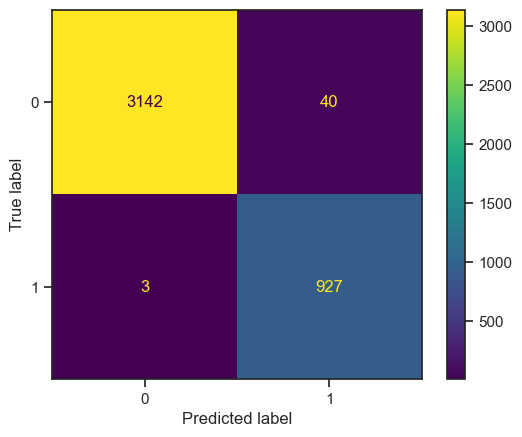

In [24]:
# Creamos el objeto de visualización de la matriz de confusión
display_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix)

# Mostramos la matriz de confusión
display_matrix.plot()

#### 5b. Compute performance metrics
En este bloque, se calculan varias métricas de rendimiento a partir de la matriz de confusión: precisión, recall, especificidad, y F1-score. Estas métricas son fundamentales para evaluar el comportamiento del modelo, especialmente en problemas de clasificación.

**Salida**: Se imprimen varias métricas clave de rendimiento basadas en la matriz de confusión:

- **Accuracy (Precisión global)**: La proporción de predicciones correctas sobre el total de predicciones.
- **Precision (Precisión)**: La proporción de predicciones positivas que fueron correctas.
- **Recall (Sensibilidad)**: La proporción de verdaderos positivos correctamente identificados.
- **Specificity (Especificidad)**: La proporción de verdaderos negativos correctamente identificados.
- **F1-score**: La media armónica entre la precisión y el recall, que equilibra ambas métricas.
<br> <br>
Estas métricas permiten evaluar el rendimiento del modelo desde diferentes perspectivas, más allá de la precisión global.


In [25]:
# Definimos una función para calcular las métricas de rendimiento basadas en la matriz de confusión
def get_performance_metrics(c_matrix):
    # Extraemos los valores de la matriz de confusión: tn (verdaderos negativos), fp (falsos positivos),
    # fn (falsos negativos), y tp (verdaderos positivos)
    tn, fp, fn, tp = c_matrix[0][0], c_matrix[0][1], c_matrix[1][0], c_matrix[1][1]
    
    # Calculamos la precisión global (accuracy)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # Calculamos la precisión (precision)
    precision = tp / (tp + fp)
    
    # Calculamos el recall (sensibilidad)
    recall = tp / (tp + fn)
    
    # Calculamos la especificidad
    specificity = tn / (tn + fp)
    
    # Calculamos el F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Devolvemos las métricas calculadas
    return accuracy, precision, recall, specificity, f1_score

# Calculamos las métricas de rendimiento utilizando la matriz de confusión
accuracy, precision, recall, specificity, f1_score = get_performance_metrics(c_matrix)

# Imprimimos la precisión global con 6 decimales
print(f"Accuracy: {accuracy:0.6f}")
# Imprimimos la precisión con 6 decimales
print(f"Precision: {precision:0.6f}")
# Imprimimos el recall con 6 decimales
print(f"Recall: {recall:0.6f}")
# Imprimimos la especificidad con 6 decimales
print(f"Specificity: {specificity:0.6f}")
# Imprimimos el F1-score con 6 decimales
print(f"F1-score: {f1_score:0.6f}")

Accuracy: 0.989543
Precision: 0.958635
Recall: 0.996774
Specificity: 0.987429
F1-score: 0.977333


### Análisis de Resultados:

1. **Accuracy (0.989543)**: El modelo tiene una precisión global muy alta, con aproximadamente un 98.95% de predicciones correctas. Esto indica que el modelo es muy eficaz en clasificar correctamente tanto las instancias positivas como negativas.

2. **Precision (0.958635)**: La precisión es del 95.86%, lo que significa que, de todas las predicciones positivas que hizo el modelo, un 95.86% fueron correctas. Esto es importante en situaciones donde los falsos positivos deben minimizarse.

3. **Recall (0.996774)**: El recall es extremadamente alto, con un valor de 99.68%. Esto indica que el modelo es muy bueno detectando las instancias positivas reales (ocupación), lo que significa que muy pocos casos positivos fueron clasificados incorrectamente como negativos (falsos negativos).

4. **Specificity (0.987429)**: La especificidad es del 98.74%, lo que indica que el modelo es también muy eficaz para identificar correctamente las instancias negativas (habitaciones no ocupadas). Este resultado sugiere que el modelo evita con éxito los falsos positivos.

5. **F1-score (0.977333)**: El F1-score, que combina la precisión y el recall, es de 97.73%, lo que indica un equilibrio sólido entre ambas métricas. El modelo mantiene un buen balance entre minimizar los falsos positivos y los falsos negativos.

### Conclusión:
Los resultados muestran que el modelo entrenado es altamente efectivo en la clasificación binaria de ocupación, con un equilibrio saludable entre precisión, recall y especificidad. Esto sugiere que el modelo es capaz de hacer predicciones muy precisas en general, tanto identificando correctamente los positivos (ocupación) como los negativos (no ocupación), minimizando al mismo tiempo los falsos positivos y los falsos negativos.

## Selección del Mejor Modelo
### Comparación de los Modelos A (Hecho a Mano) y B (TensorFlow)
#### Parámetros Obtenidos:

**Modelo A (Hecho a Mano)**:
Los parámetros (pesos y bias) obtenidos manualmente son los siguientes: <br>
array([[-0.72815137], [ 0.20614421], [ 4.29723527], [ 0.95814606], [ 0.17301175], [-3.70904074]])

**Modelo B (TensorFlow)**:
Los parámetros obtenidos utilizando TensorFlow son los siguientes: <br>
array([[-0.6764667 ], [ 0.48139647], [ 4.514354 ], [ 1.0179557 ], [-0.09119653]], dtype=float32), array([-3.9561274], dtype=float32)


#### Análisis de los Parámetros:

1. **Pesos**:
   - Los pesos entre ambos modelos son similares en magnitud, pero con ligeras diferencias. Estas diferencias pueden atribuirse a las optimizaciones que aplica TensorFlow, como el uso del optimizador Adam, que ajusta dinámicamente la tasa de aprendizaje.
   
   - **Comparación Peso por Peso**:
     - El primer peso es ligeramente menor en el modelo B (`-0.6764667`) comparado con el modelo A (`-0.72815137`), lo que puede indicar un ajuste más fino en el modelo de TensorFlow.
     - El segundo peso en el modelo B (`0.48139647`) es mayor que en el modelo A (`0.20614421`), lo que sugiere que el modelo B asigna mayor importancia a esta característica.
     - El tercer peso es bastante similar en ambos modelos, pero el modelo B asigna un valor ligeramente mayor (`4.514354` vs `4.29723527`).
     - El cuarto peso es un poco mayor en el modelo B (`1.0179557` vs `0.95814606`).
     - El quinto peso es positivo en el modelo A (`0.17301175`), pero negativo en el modelo B (`-0.09119653`), lo que refleja un enfoque diferente en cómo cada modelo interpreta esta característica.

   - **Bias**:
     - El bias del modelo A es `-3.70904074`, mientras que en el modelo B es `-3.9561274`. Aunque ambos son similares, el ajuste más negativo del bias en el modelo B puede contribuir a su mejor rendimiento.

   - **Conclusión sobre los Pesos**:
     - El modelo B ajusta los pesos de manera más precisa gracias a las optimizaciones de TensorFlow, lo que le permite asignar mejor la importancia a cada característica y lograr un rendimiento ligeramente superior en las métricas de evaluación.

#### Diferencias en la Implementación:

- **Modelo A (Hecho a Mano)**:
  - Este modelo implementa un perceptrón sigmoide de forma manual, calculando la función de costo, los gradientes, y actualizando los pesos mediante gradiente descendente.
  - Si bien es funcional, las pequeñas diferencias en los pesos y bias indican que no está tan optimizado como el modelo de TensorFlow.
  - El aprendizaje de este modelo puede ser más lento o menos eficiente en situaciones con grandes volúmenes de datos.

- **Modelo B (TensorFlow)**:
  - Utiliza TensorFlow y aplica optimizaciones avanzadas, como el optimizador Adam, que ajusta dinámicamente la tasa de aprendizaje durante el entrenamiento.
  - Estas optimizaciones permiten obtener un ajuste más preciso de los parámetros (pesos y bias) y mejorar el rendimiento general del modelo.
  - Este modelo es ideal cuando se requiere entrenar con conjuntos de datos grandes o cuando se desea obtener resultados de manera más rápida y eficiente.

#### Métricas de Rendimiento:

| Métrica       | Modelo A (Hecho a Mano) | Modelo B (TensorFlow) |
|---------------|-------------------------|-----------------------|
| **Accuracy**  | 0.989300                | 0.989543              |
| **Precision** | 0.957645                | 0.958635              |
| **Recall**    | 0.996774                | 0.996774              |
| **Specificity**| 0.987115               | 0.987429              |
| **F1-score**  | 0.976818                | 0.977333              |

- **Accuracy**: Ambos modelos tienen una precisión muy alta, pero el modelo B (TensorFlow) tiene una ligera ventaja.
- **Precision**: El modelo B tiene una precisión ligeramente mejor, lo que significa que comete menos falsos positivos.
- **Recall**: Ambos modelos tienen el mismo recall, lo que indica que ambos identifican correctamente casi todas las instancias positivas.
- **Specificity**: El modelo B también tiene una ventaja en la especificidad, identificando mejor las instancias negativas.
- **F1-score**: El modelo B presenta un F1-score mejorado, lo que sugiere un mejor equilibrio entre la precisión y el recall.

#### Conclusión:

El **Modelo B (TensorFlow)** es el mejor debido a sus ventajas en términos de:
- **Optimización interna**: TensorFlow utiliza técnicas avanzadas de ajuste de parámetros como el optimizador Adam, lo que mejora la tasa de aprendizaje y ajuste de los pesos.
- **Eficiencia**: TensorFlow es más eficiente en términos de tiempo de cómputo y optimización de recursos, lo que es crucial para manejar grandes cantidades de datos.
- **Rendimiento**: Aunque las diferencias en las métricas son pequeñas, el modelo B supera al modelo A en todas las métricas principales, lo que lo hace una mejor opción en términos de precisión y ajuste del modelo.

En conclusión, el **Modelo B (TensorFlow)** es la mejor opción; ya que, ofrece un rendimiento ligeramente superior y está mejor optimizado para un entrenamiento más eficiente y preciso.

**Código de Honor**
<br>
*"Doy mi palabra de que he realizado esta actividad con Integridad Académica"*